In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

path = "./PanoramaImages/ImageSet2/"
files = os.listdir(path)

images = []

for file in files:
    if file != ".DS_Store":
        print(file)
        image_path = path + file
        img = cv.imread(image_path,0)
        img = cv.resize(img,(256,256))
        images.append(img)

sift = cv.xfeatures2d.SIFT_create()
#print(sift)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

# bf = cv.BFMatcher()
# matches = bf.knnMatch(des1,des2, k=2)
flann = cv.FlannBasedMatcher(index_params,search_params)

bottom.jpg
top.jpg
middle.jpg


In [112]:
def panoramic_image(images,image,i):
    
    if i == -1:
        return image
    
    if i == 2:
        img1 = images[2]
        img2 = images[1]
        
        rows,cols = img1.shape
        M = cv.getRotationMatrix2D((cols/2,rows/2),90,1)
        dst1 = cv.warpAffine(img1,M,(cols,rows))
        
        rows,cols = img2.shape
        M = cv.getRotationMatrix2D((cols/2,rows/2),90,1)
        dst2 = cv.warpAffine(img2,M,(cols,rows))
        
        kp1,kp2,des1,des2 = find_keypoints(dst1,dst2)
         
        H = find_homography(kp1,kp2,des1,des2)
        
        if len(H) > 0 :
            dst = stitch_images(dst1,dst2,H)
            plt.imshow(dst)
            return panoramic_image(images,dst,i-2)
    
    else:
        dst1 = image
        img2 = images[i]
        
        rows,cols = img2.shape
        M = cv.getRotationMatrix2D((cols/2,rows/2),90,1)
        dst2 = cv.warpAffine(img2,M,(cols,rows))
        
        kp1,kp2,des1,des2 = find_keypoints(dst1,dst2)
        
        H = find_homography(kp1,kp2,des1,des2)
        
        if len(H) > 0 :
            print(i)
            dst = stitch_images(dst1,dst2,H)
            plt.imshow(dst)
            return panoramic_image(images,dst,i-1)

        
def find_homography(kp1,kp2,des1,des2):
    matches = flann.knnMatch(des1,des2,k = 2)
    good = []
    for i , (m, n) in enumerate(matches):
        if m.distance < 0.62*n.distance:
            good.append((m.trainIdx, m.queryIdx))

    if len(good) > 4:
        pointsCurrent = kp2
        pointsPrevious = kp1

        matchedPointsCurrent = np.float32(
            [pointsCurrent[i].pt for (i, __) in good]
        )
        matchedPointsPrev = np.float32(
            [pointsPrevious[i].pt for (__, i) in good]
            )

        H, s = cv.findHomography(matchedPointsCurrent, matchedPointsPrev, cv.RANSAC, 4)
        print(H)
        return H
    else:
        print("cant find enough keypoints")
        return []
    

def stitch_images(img1,img2,H):
    dst = cv.warpPerspective(img2,H,(img2.shape[1] + img1.shape[1], img1.shape[0]))
    plt.imshow(dst),plt.title('Warped Image')
    plt.show()
    plt.figure()
    
    rows,cols = dst.shape
    M = np.float32([[1,0,-1],[0,1,0]])
    dst = cv.warpAffine(dst,M,(cols,rows))

    dst[:,:img1.shape[1]] = img1
    
    
#     for i in range(dst.shape[0]):
#         for j in range(img1.shape[1] - 3, img1.shape[1] + 3):
#             dst[i][j] = np.uint8((dst[i][j - 1] + dst[i][j + 1])/2)
    
    width = 0
    for i in range(dst.shape[1]-1 ,0 ,-1):
        if dst[0][i] != 0:
            width = i
            break
    
    dst = dst[:,:width -4]
    
    plt.imshow(dst)
    plt.show()
    
    return dst


def find_keypoints(img1,img2):
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    des1 = np.array(des1)
    des2 = np.array(des2)
    
    return kp1,kp2,des1,des2

[[ 8.85243418e-01  2.35423147e-03  1.13009980e+02]
 [-5.61985669e-02  9.71478792e-01 -1.04883875e+00]
 [-7.39383720e-04  5.97254024e-05  1.00000000e+00]]


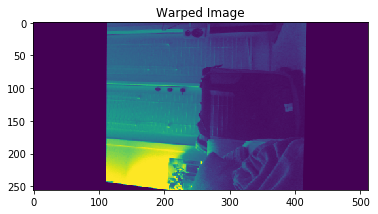

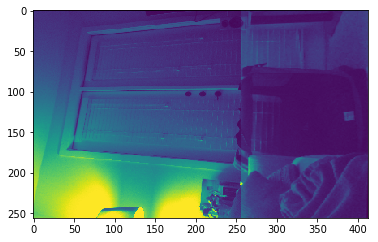

[[ 4.49236947e-01 -7.85789724e-02  2.37035821e+02]
 [-2.20320980e-01  8.46232687e-01  2.02826130e+01]
 [-1.94197584e-03 -2.22594646e-04  1.00000000e+00]]
0


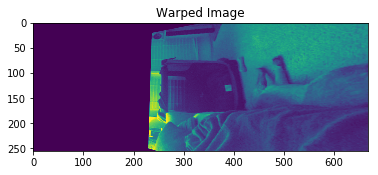

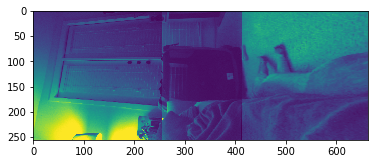

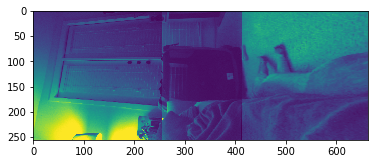

In [113]:
p_image = panoramic_image(images,images[2],2)
# plt.imshow(p_image)

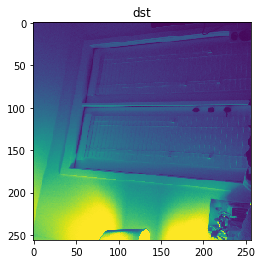

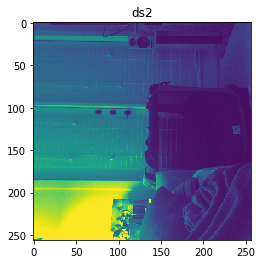

[[ 8.85243418e-01  2.35423147e-03  1.13009980e+02]
 [-5.61985669e-02  9.71478792e-01 -1.04883875e+00]
 [-7.39383720e-04  5.97254024e-05  1.00000000e+00]]
here


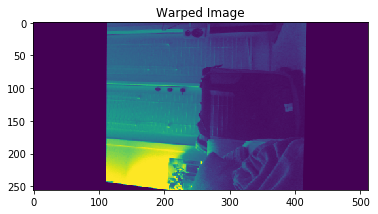

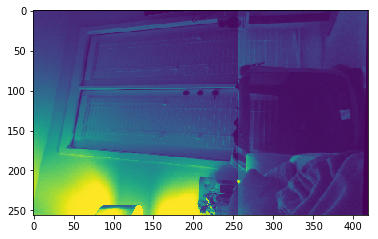

In [58]:
img = images[2]
rows,cols = img.shape
M = cv.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst),plt.title("dst")
plt.show()
plt.figure()

img = images[1]
rows,cols = img.shape
M = cv.getRotationMatrix2D((cols/2,rows/2),90,1)
dst2 = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst2),plt.title("ds2")
plt.show()
plt.figure()


kp1,kp2,des1,des2 = find_keypoints(dst,dst2)

Hr = find_homography(kp1,kp2,des1,des2)

if len(H) > 0 :
    print("here")
    dst = stitch_images(dst,dst2,H)
    plt.imshow(dst)